## Elastic Net Regression

1. Lasso
2. Rigid
Elastic Net - combines both

In [1]:
# Import libraries 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# dataset 
X, y = make_regression(n_samples = 500, n_features = 5, noise = 0.1, random_state = 42)

In [3]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [4]:
# Initailize the Elastic Net model
elastic_net = ElasticNet(alpha=1., l1_ratio = 0.5)

In [5]:
# Train the model
elastic_net.fit(X_train, y_train)

ElasticNet()

In [6]:
# Make prediction
y_pred = elastic_net.predict(X_test)

In [7]:
# Calculate the R2
elastic_net.score(X_test, y_test)

0.8789452627885138

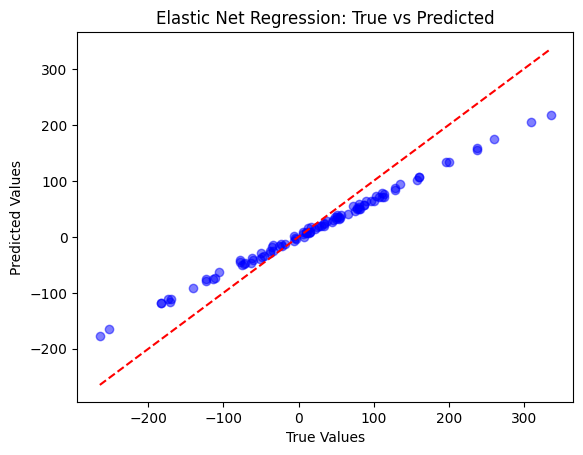

In [8]:
# Plot the true vs predicted values

plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red',linestyle = '--' )
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Elastic Net Regression: True vs Predicted')
plt.show()

In [9]:
# Tuning Hyperparameter

from sklearn.model_selection import GridSearchCV

# set the parameter grid

param_grid = {
    'alpha': [0.1, 0.5,1.0,5.0, 10.0],
    'l1_ratio':[1.0,0.5,0.7,1.0]
}

# model
elastic_net = ElasticNet()

In [10]:
# Perform GridSearch

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'l1_ratio': [1.0, 0.5, 0.7, 1.0]})

In [11]:
# Best parameters
grid_search.best_params_

{'alpha': 0.1, 'l1_ratio': 1.0}